In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df.action.count()

8188

In [3]:
# number of unique users
df.id.nunique()

6328

In [4]:
# size of control group and experiment group
df_group = df[['id','group']]
df_group = df_group.drop_duplicates()
df_group['group'].value_counts()

control       3332
experiment    2996
Name: group, dtype: int64

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [5]:
# duration of this experiment
df['timestamp'] = pd.to_datetime(df.timestamp)
start, end = df.timestamp.min(), df.timestamp.max()
(start, end)


(Timestamp('2016-09-24 17:42:27.839496'),
 Timestamp('2017-01-18 10:24:08.629327'))

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [6]:
# action types in this experiment
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?


Because one page may have greater percentage of clicks than the other page. Along those lines, number of visitors will not be same for both the pages.

### 5. Define the click through rate (CTR) for this experiment.


CTR: # clicks by unique users / # views by unique users

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} \leq CTR_{old} $$
$$H_1: CTR_{new} \gt CTR_{old} $$

Calculate Click Through Metric

In [8]:
contorl_df = df.query('group == "control"')

In [9]:
control_CTR = contorl_df.query('action == "click"').id.nunique() / contorl_df.query('action == "view"').id.nunique() 
control_CTR

0.2797118847539016

In [10]:
experiment_df = df.query('group == "experiment"')
experiment_CTR = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique() 
experiment_CTR

0.3097463284379172

In [11]:
obs_diff = experiment_CTR - control_CTR
obs_diff

0.030034443684015644

In [12]:
diffs = []

for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    contorl_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_CTR = contorl_df.query('action == "click"').id.nunique() / contorl_df.query('action == "view"').id.nunique()
    experiment_CTR = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_CTR - control_CTR)

    
    

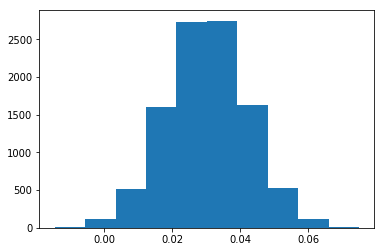

In [13]:
plt.hist(diffs);

In [14]:
diff_std = np.std(diffs)
diff_std

0.011865705186953467

In [15]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

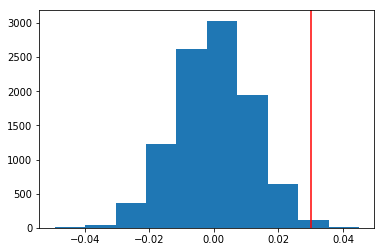

In [18]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red')

In [22]:
(null_vals > obs_diff).mean()

0.0061